**Dataset Info**

- Paper: Towards the development of realistic botnet dataset in the internet of things for network forensic analytics: Bot-iot dataset
- Published in: Future Generation Computer Systems 100
- Date: 2019
- Links: 
    - https://research.unsw.edu.au/projects/bot-iot-dataset
    - https://unsw-my.sharepoint.com/personal/z5131399_ad_unsw_edu_au/_layouts/15/onedrive.aspx

In [1]:
import os
import pandas as pd

df_train = pd.read_csv(os.getcwd() + '/../data/bot-iot/Bot-IoT_Dataset/Dataset/5%/10-best features/10-best Training-Testing split/UNSW_2018_IoT_Botnet_Final_10_best_Training.csv', low_memory=False)
df_test = pd.read_csv(os.getcwd() + '/../data/bot-iot/Bot-IoT_Dataset/Dataset/5%/10-best features/10-best Training-Testing split/UNSW_2018_IoT_Botnet_Final_10_best_Testing.csv', low_memory=False)

In [2]:
print("No of Featueres: ", len(df_train.columns))
print("Features: ", df_train.columns)

No of Featueres:  19
Features:  Index(['pkSeqID', 'proto', 'saddr', 'sport', 'daddr', 'dport', 'seq', 'stddev',
       'N_IN_Conn_P_SrcIP', 'min', 'state_number', 'mean', 'N_IN_Conn_P_DstIP',
       'drate', 'srate', 'max', 'attack', 'category', 'subcategory'],
      dtype='object')


In [3]:
print(df_train.head(1).to_json(orient='records', lines=True))

{"pkSeqID":3142762,"proto":"udp","saddr":"192.168.100.150","sport":"6551","daddr":"192.168.100.3","dport":"80","seq":251984,"stddev":1.900363,"N_IN_Conn_P_SrcIP":100,"min":0.0,"state_number":4,"mean":2.687519,"N_IN_Conn_P_DstIP":100,"drate":0.0,"srate":0.494549,"max":4.031619,"attack":1,"category":"DDoS","subcategory":"UDP"}



In [4]:
print("No of classes: ", len(df_train['category'].unique()))
print(df_train['category'].unique())

No of classes:  5
['DDoS' 'DoS' 'Reconnaissance' 'Normal' 'Theft']


In [5]:
print("No of sub classes: ", len(df_train['subcategory'].unique()))
print(df_train['subcategory'].unique())

No of sub classes:  8
['UDP' 'TCP' 'OS_Fingerprint' 'Service_Scan' 'HTTP' 'Normal' 'Keylogging'
 'Data_Exfiltration']


In [6]:
# print distinct pairs of category and subcategory
print("No of distinct pairs of category and subcategory: ", len(df_train.groupby(['category', 'subcategory']).size()))
print(df_train.groupby(['category', 'subcategory']).size())

No of distinct pairs of category and subcategory:  11
category        subcategory      
DDoS            HTTP                    786
                TCP                  782228
                UDP                  758301
DoS             HTTP                   1184
                TCP                  492615
                UDP                  826349
Normal          Normal                  370
Reconnaissance  OS_Fingerprint        14293
                Service_Scan          58626
Theft           Data_Exfiltration         6
                Keylogging               59
dtype: int64


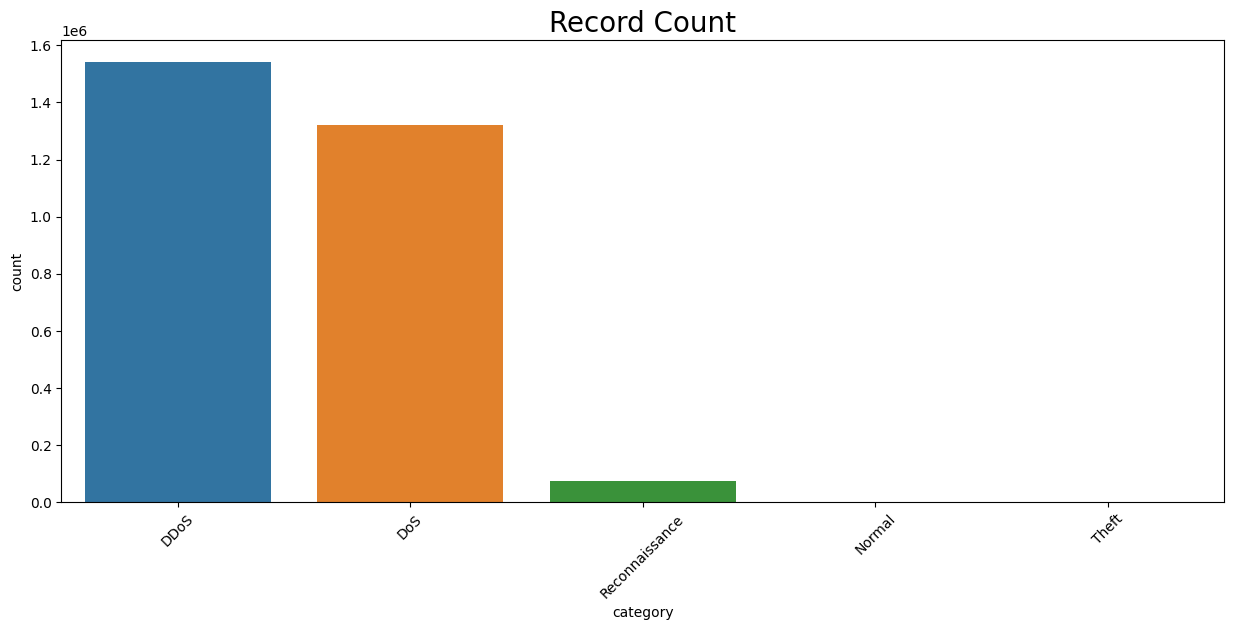

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 6))
plt.xticks(rotation=45)
# log scale

s = sns.countplot(data=df_train, x='category', hue='category')
# for p in s.patches:
#     s.annotate(format(p.get_height(), '.0f'), 
#                (p.get_x() + p.get_width() / 2., p.get_height()), 
#                ha = 'center', va = 'center', 
#                xytext = (0, 9), 
#                textcoords = 'offset points')
plt.title('Record Count', fontsize=20)

plt.show()

In [17]:
# remove duplicate rows
df_no_duplicates = df_train.drop_duplicates()
# print length of dataset after removing duplicates
print("Length of dataset before removing duplicates: ", len(df_train))
print("Length of dataset after removing duplicates: ", len(df_no_duplicates))


Length of dataset before removing duplicates:  2934817
Length of dataset after removing duplicates:  2934817
